In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import find_dotenv, load_dotenv
dotenv_filepath = find_dotenv()
load_dotenv(dotenv_filepath)
project_path = os.path.dirname(dotenv_filepath)

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(project_path)
sys.path.append(src_dir)

In [2]:
plt.style.use("ggplot")

In [25]:
 # import project methods
%aimport src.datasets
from src.datasets import get_disease_data, load_clinical_data
from src import datasets as ds
from src.learn import plot_feature_importances

In [4]:
DISEASE = "fanconi"
SEED = 42

In [32]:
X, Y, circuits, genes, clinical = get_disease_data("fanconi", pathways)

In [6]:
Y.columns

Index(['P.hsa03460m.48', 'P.hsa03460m.25.40', 'P.hsa03460m.64',
       'P.hsa03460m.28', 'P.hsa03460m.7', 'P.hsa03460m.16.49',
       'P.hsa03460m.16.34', 'P.hsa04110.46', 'P.hsa04110.96.97',
       'P.hsa04110.60.10.11.12.13.14.9', 'P.hsa04110.48',
       'P.hsa04110.43.83.84.85', 'P.hsa04110.59.15.16.17.18.19.20',
       'P.hsa04110.10.11.12.13.14.9.15.16.17.18.19.20', 'P.hsa04114.59',
       'P.hsa04114.56', 'P.hsa04114.80', 'P.hsa04914.42', 'P.hsa04914.23',
       'P.hsa04914.11', 'P.hsa04914.15', 'P.hsa04914.30', 'P.hsa04914.29',
       'P.hsa04914.39', 'P.hsa04914.34'],
      dtype='object', name='index')

In [10]:
Y = Y.filter(axis=1, regex="hsa03460m")

In [12]:
Y.shape, Y.columns

((11688, 7), Index(['P.hsa03460m.48', 'P.hsa03460m.25.40', 'P.hsa03460m.64',
        'P.hsa03460m.28', 'P.hsa03460m.7', 'P.hsa03460m.16.49',
        'P.hsa03460m.16.34'],
       dtype='object', name='index'))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=SEED)

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [9]:
model = GaussianProcessRegressor()

In [10]:
model.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [11]:
Y_train_hat = model.predict(X_train)
Y_test_hat = model.predict(X_test)

In [12]:
from sklearn import metrics

In [18]:
metrics.r2_score(Y_train, Y_train_hat), metrics.r2_score(Y_test, Y_test_hat)

(1.0, 0.8272547232620832)

In [13]:
r2_test = metrics.r2_score(Y_test, Y_test_hat, multioutput="raw_values")
r2_test = pd.DataFrame(r2_test, index=Y.columns, columns=["r2"])
r2_test["pathways"] = Y.columns.str.split(".").str[1]

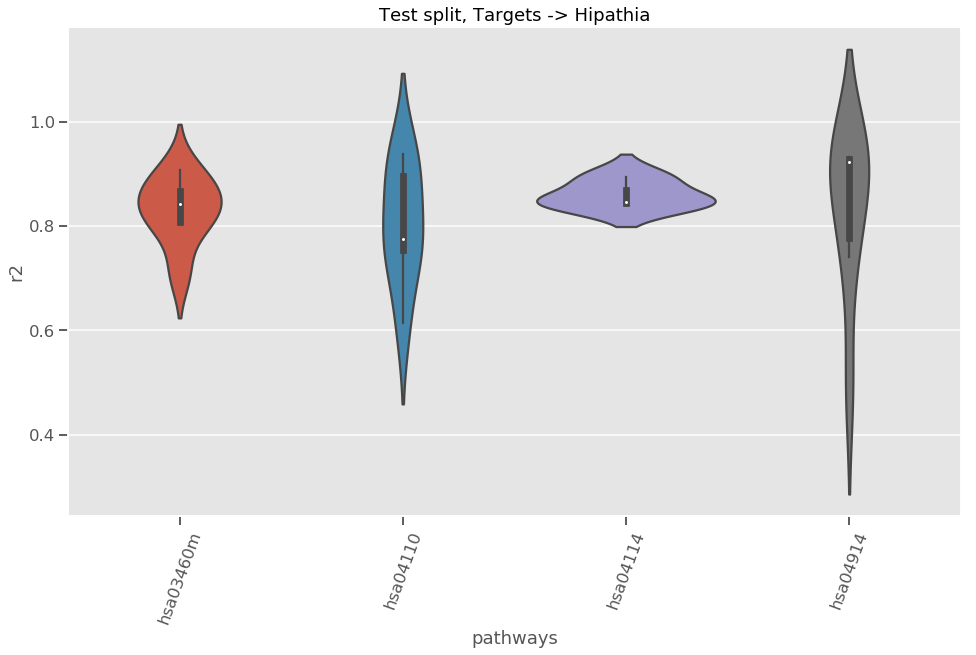

In [22]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.violinplot(x="pathways", y="r2", data=r2_test, ax=ax);
ax.set_title("Test split, Targets -> Hipathia");
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cvs = cross_val_score(model, X, Y, cv=10, n_jobs=-1)

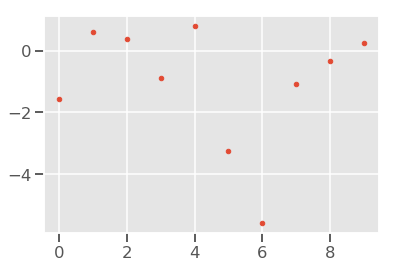

In [21]:
plt.plot(cvs, ".")

In [15]:
rf_path = "/run/user/1001/gvfs/sftp:host=gattaca1,user=cloucera/mnt/lustre/scratch/home/cloucera/projects/hord/review_march_2019/rf/fanconi/02/hypmorf_fanconi_02_from_targets_to_pathways.pkl"

In [21]:
from sklearn.externals import joblib
from sklearn import metrics

In [17]:
with open(rf_path, "rb") as f:
    model = joblib.load(f)

/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/cloucera/apps/miniconda3/envs/hord/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estim

In [18]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=0.5090457798984857, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=324, n_jobs=24,
           oob_score=False, random_state=0, verbose=False,
           warm_start=False)

In [19]:
Y_train_hat = model.predict(X_train)
Y_test_hat = model.predict(X_test)

In [22]:
metrics.r2_score(Y_train, Y_train_hat), metrics.r2_score(Y_test, Y_test_hat)

(0.9977738462552647, 0.8219569236525679)

In [23]:
r2_test = metrics.r2_score(Y_test, Y_test_hat, multioutput="raw_values")
r2_test = pd.DataFrame(r2_test, index=Y.columns, columns=["r2"])
r2_test["pathways"] = Y.columns.str.split(".").str[1]

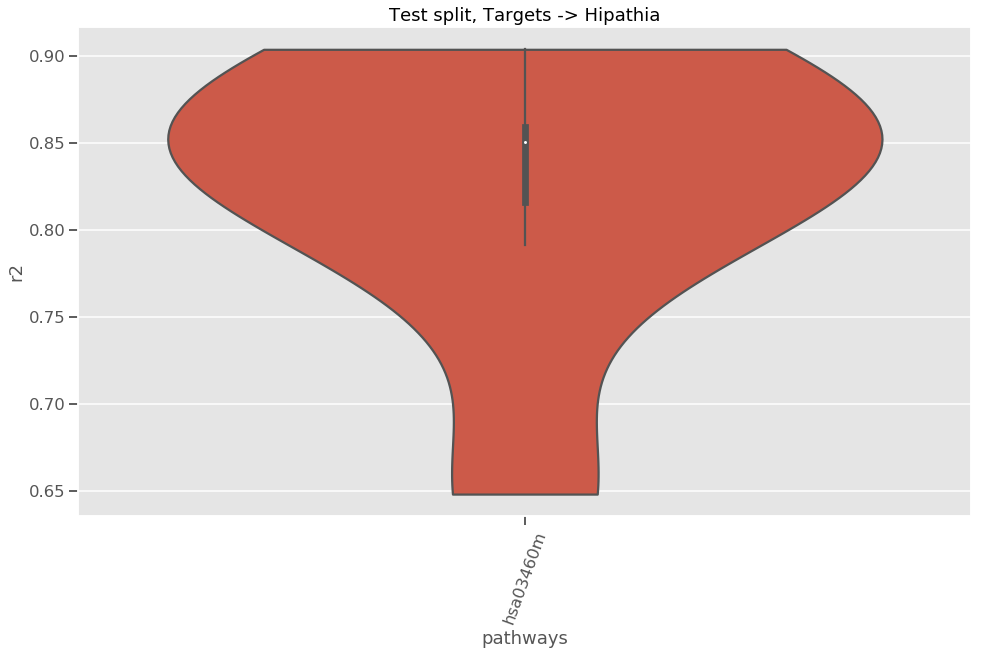

In [24]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.violinplot(x="pathways", y="r2", data=r2_test, ax=ax, cut=0);
ax.set_title("Test split, Targets -> Hipathia");
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

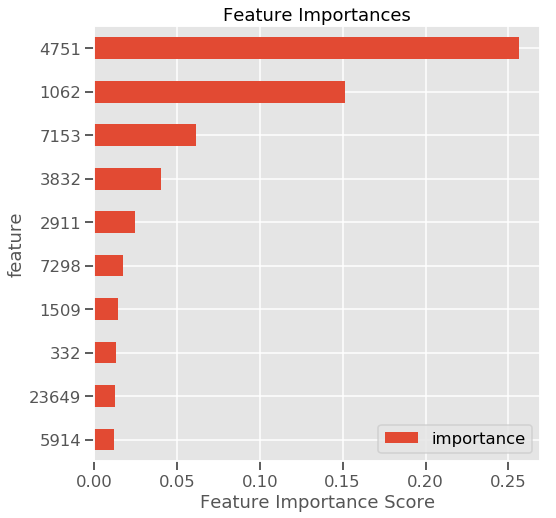

,importance
feature,
5914,0.012179
23649,0.012675
332,0.013564
1509,0.014293
7298,0.017441
2911,0.025027
3832,0.040689
7153,0.061529
1062,0.151647


In [27]:
plot_feature_importances(model, X_train)

In [432]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [34]:
X.shape

(11688, 965)

In [36]:
genes.head()

,in_hipathia,approved_targets,arthr_infl_targets,JIA_targets,infl_targets
index,,,,,
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
9,False,False,False,False,False
10,False,False,False,False,False


In [37]:
genes.in_hipathia.sum()

3235

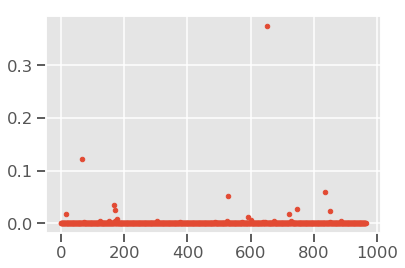

In [38]:
plt.plot(rf.feature_importances_, ".")

In [39]:
from src.learn import plot_feature_importances

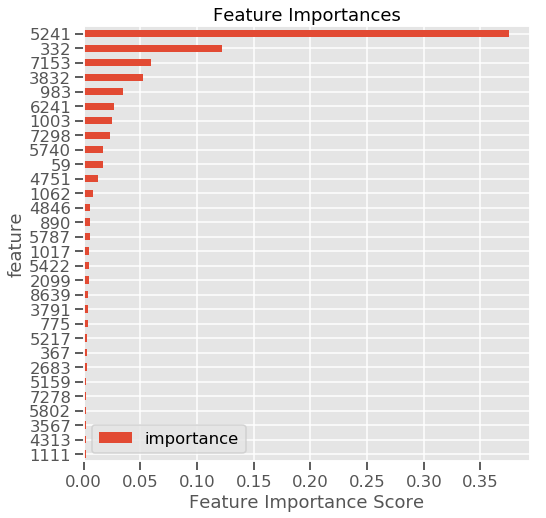

,importance
feature,
1111,0.001671
4313,0.001844
3567,0.001899
5802,0.002141
7278,0.002143
5159,0.002387
2683,0.002616
367,0.003088
5217,0.003091


In [40]:
imp = plot_feature_importances(X_train=X_train, clf=model, top_n=30)

In [41]:
cvs_rf = cross_val_score(rf, X, Y, cv=10, n_jobs=-1)

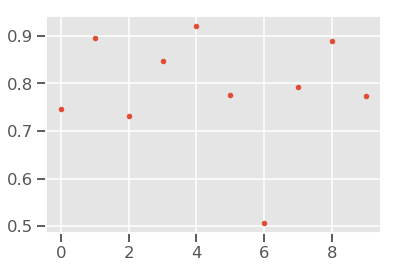

In [42]:
plt.plot(cvs_rf, ".")

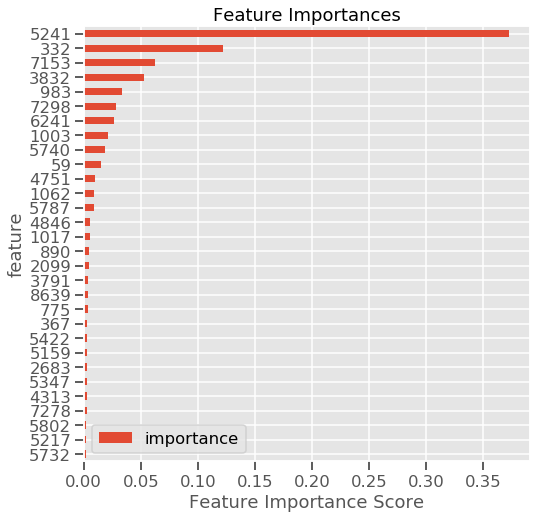

In [45]:
rf.fit(X, Y)
imp = plot_feature_importances(X_train=X, clf=rf, top_n=30)

In [49]:
base_model_dir = os.path.join("/run/user/1001/gvfs/sftp:host=gattaca1,user=cloucera/mnt/lustre/scratch/home/cloucera/projects/hord/review_march_2019/rf/fanconi/02")
global_fname = "hypmorf_fanconi_02_from_targets_to_pathways_global_relevance.tsv"
gobal_path = os.path.join(base_model_dir, global_fname)

In [72]:
global_rel = pd.read_csv(gobal_path, sep="\t", index_col=0)
global_rel.index = global_rel.index.astype(str)
global_rel.head()

,relevance
15,0.000084
18,0.000398
19,0.000151
25,0.000267
27,0.000110


In [73]:
global_rel.sort_values(by="relevance", ascending=False)

,relevance
5241,0.374816
332,0.121412
7153,0.060072
3832,0.051647
983,0.034030
1003,0.025979
6241,0.025888
7298,0.023322
5740,0.017458
59,0.017074


In [52]:
genes.loc[imp.index, :]

,in_hipathia,approved_targets,arthr_infl_targets,JIA_targets,infl_targets
feature,,,,,
5732,True,True,False,False,False
5217,True,True,False,False,False
5802,False,True,False,False,False
7278,True,True,False,False,False
4313,True,True,False,False,False
5347,True,True,False,False,False
2683,False,True,False,False,False
5159,True,True,False,False,False
5422,False,True,False,False,False


In [74]:
class dummy(object):
    pass

clf = dummy()
clf.feature_importances_ = global_rel.relevance[X_train.columns].values.ravel()

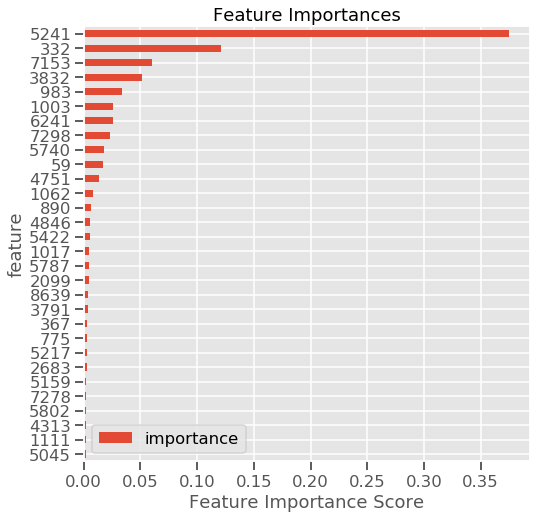

In [76]:
imp = plot_feature_importances(X_train=X_train, clf=clf, top_n=30)

In [77]:
genes.loc[imp.index, :]

,in_hipathia,approved_targets,arthr_infl_targets,JIA_targets,infl_targets
feature,,,,,
5045,False,True,False,False,False
1111,True,True,False,False,False
4313,True,True,False,False,False
5802,False,True,False,False,False
7278,True,True,False,False,False
5159,True,True,False,False,False
2683,False,True,False,False,False
5217,True,True,False,False,False
775,True,True,False,False,False


In [69]:
global_rel.shape

(965, 1)

In [70]:
X_train.shape

(8766, 965)

In [193]:
def perform_cv(X, y, estimator, seed, tissue):
    from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
    from sklearn import metrics
    from collections import defaultdict
    
    stats = {
        "evs_mo":{"train": [], "test": []},
        "evs_ua":{"train": [], "test": []},
        "mae_mo":{"train": [], "test": []},
        "mae_ua":{"train": [], "test": []},
        "mse_mo":{"train": [], "test": []},
        "mse_ua":{"train": [], "test": []},
        "msle_mo":{"train": [], "test": []},
        "msle_ua":{"train": [], "test": []},
        "r2_mo":{"train": [], "test": []},
        "r2_ua":{"train": [], "test": []},
    }
    
    skf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
    for train_index, test_index in skf.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]

        estimator.fit(X_train, y_train)

        y_train_hat = estimator.predict(X_train)
        y_test_hat = estimator.predict(X_test)

        # metrics computation
        
        # Explained variance
        
        evs_mo_train = metrics.explained_variance_score(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["evs_mo"]["train"].append(evs_mo_train)

        evs_mo_test = metrics.explained_variance_score(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["evs_mo"]["test"].append(evs_mo_test)

        evs_ua_train = metrics.explained_variance_score(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["evs_ua"]["train"].append(evs_ua_train)

        evs_ua_test = metrics.explained_variance_score(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["evs_ua"]["test"].append(evs_ua_test)
        
        # MAE
        
        mae_mo_train = metrics.mean_absolute_error(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["mae_mo"]["train"].append(mae_mo_train)

        mae_mo_test = metrics.mean_absolute_error(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["mae_mo"]["test"].append(mae_mo_test)

        mae_ua_train = metrics.mean_absolute_error(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["mae_ua"]["train"].append(mae_ua_train)

        mae_ua_test = metrics.mean_absolute_error(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["mae_ua"]["test"].append(mae_ua_test)
        
        # MSE
        
        mse_mo_train = metrics.mean_squared_error(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["mse_mo"]["train"].append(mse_mo_train)

        mse_mo_test = metrics.mean_squared_error(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["mse_mo"]["test"].append(mse_mo_test)

        mse_ua_train = metrics.mean_squared_error(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["mse_ua"]["train"].append(mse_ua_train)

        mse_ua_test = metrics.mean_squared_error(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["mse_ua"]["test"].append(mse_ua_test)
        
        # MSLE
        
        msle_mo_train = metrics.mean_squared_log_error(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["msle_mo"]["train"].append(msle_mo_train)

        msle_mo_test = metrics.mean_squared_log_error(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["msle_mo"]["test"].append(msle_mo_test)

        msle_ua_train = metrics.mean_squared_log_error(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["msle_ua"]["train"].append(msle_ua_train)

        msle_ua_test = metrics.mean_squared_log_error(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["msle_ua"]["test"].append(msle_ua_test)
        
        # r2
        
        r2_mo_train = metrics.r2_score(
            y_train,
            y_train_hat,
            multioutput="raw_values")
        stats["r2_mo"]["train"].append(r2_mo_train)

        r2_mo_test = metrics.r2_score(
            y_test,
            y_test_hat,
            multioutput="raw_values"
        )
        stats["r2_mo"]["test"].append(r2_mo_test)

        r2_ua_train = metrics.r2_score(
            y_train,
            y_train_hat,
            multioutput="uniform_average"
        )
        stats["r2_ua"]["train"].append(r2_ua_train)

        r2_ua_test = metrics.r2_score(
            y_test,
            y_test_hat,
            multioutput="uniform_average"
        )
        stats["r2_ua"]["test"].append(r2_ua_test)
        
    return stats

In [194]:
from sklearn.dummy import DummyRegressor

In [195]:
cv_stats = perform_cv(X, Y, estimator=DummyRegressor(), seed=42, tissue=clinical.tissue)

In [196]:
from sklearn.externals import joblib

In [197]:
joblib.dump(cv_stats, open("dict.pkl", "wb"))

In [198]:
cv_stats_loaded = joblib.load(open("dict.pkl", "rb"))

In [387]:
%autoreload 2
from src.learn import BoMorf

In [388]:
model = BoMorf("hyperopt_automorf", framework="hyperopt", n_jobs=-1, cv=2, n_calls=10, out="./out")

In [389]:
model.fit(X.iloc[1:100, :], Y.iloc[1:100, :])

100%|██████████| 1/1 [00:01<00:00,  1.36s/it, best loss: 0.008351965499095448]


In [390]:
model.score(X, Y)

0.1800736666081594

In [391]:
model.save(out="./out")

In [392]:
model_loaded = BoMorf.load(name="hyperopt_automorf", out="./out")

In [393]:
model

BoMorf(copy_X_train=(True,), cv=2, framework='hyperopt', n_calls=10,
    n_jobs=-1, name='hyperopt_automorf', out=PosixPath('out'),
    random_state=42)

In [394]:
model_loaded

BoMorf(copy_X_train=((True,),), cv=2, framework='hyperopt', n_calls=10,
    n_jobs=-1, name='hyperopt_automorf', out=PosixPath('out'),
    random_state=42)

In [395]:
model_loaded.score(X, Y)

0.18007366660815954

In [396]:
!ls out

hyperopt_automorf_estimator.pkl  sko_automorf_opt.pkl
hyperopt_automorf_opt.pkl


In [397]:
model.X_train_

array([[0.12888154, 0.31063544, 0.40327909, ..., 0.28617353, 0.46278271,
        0.29319248],
       [0.04239911, 0.27303573, 0.40084364, ..., 0.32380694, 0.48202143,
        0.21378607],
       [0.10536843, 0.30422671, 0.39459946, ..., 0.30129932, 0.49001099,
        0.13921703],
       ...,
       [0.09552318, 0.29202336, 0.41093215, ..., 0.30037057, 0.47593304,
        0.12568674],
       [0.06769825, 0.29522255, 0.42127482, ..., 0.28999939, 0.43507626,
        0.21244335],
       [0.1050717 , 0.26258939, 0.46102074, ..., 0.29183235, 0.49928945,
        0.12745424]])

In [400]:
X.corr().head()

,15,18,19,25,27,28,30,32,34,43,...,51727,51762,54205,57016,63036,79090,118429,140465,203068,729230
15,1.000000,0.303226,-0.250703,-0.446815,-0.129653,0.093772,0.096895,-0.310239,-0.271515,0.235088,...,-0.500658,0.097388,-0.139781,-0.144675,0.020333,0.179950,-0.442639,0.116214,-0.242410,0.093902
18,0.303226,1.000000,-0.257012,-0.401492,-0.026744,-0.105135,0.301900,-0.180313,0.061340,0.339597,...,-0.129874,-0.175888,0.052344,-0.249140,0.165726,0.020707,-0.526437,0.212029,-0.285900,-0.278311
19,-0.250703,-0.257012,1.000000,0.373894,0.275395,0.119114,-0.009325,0.428977,-0.111547,-0.337238,...,0.210243,0.149522,-0.202949,0.143219,-0.078072,-0.047247,0.567101,-0.283206,-0.029445,0.260124
25,-0.446815,-0.401492,0.373894,1.000000,0.366886,0.086677,-0.514742,0.306708,-0.073186,-0.339509,...,0.377661,0.057954,-0.077518,0.081405,-0.119570,-0.284786,0.613210,-0.248444,0.278294,-0.046443
27,-0.129653,-0.026744,0.275395,0.366886,1.000000,-0.252892,-0.379271,-0.024736,-0.258813,-0.216545,...,0.126231,0.287966,-0.111484,-0.247129,-0.019720,-0.458714,0.115625,-0.037031,0.232354,-0.268582


In [401]:
x_c = X.corr()

In [402]:
x_c_5241 = x_c["5241"]

In [412]:
",".join(x_c_5241[x_c_5241.abs() > 0.7].index.tolist())

'59,1909,5139,5241,5740,8654'

In [409]:
X.shape

(11688, 965)

In [410]:
Y.shape

(11688, 25)

In [414]:
Y.columns.tolist()

['P.hsa03460m.48',
 'P.hsa03460m.25.40',
 'P.hsa03460m.64',
 'P.hsa03460m.28',
 'P.hsa03460m.7',
 'P.hsa03460m.16.49',
 'P.hsa03460m.16.34',
 'P.hsa04110.46',
 'P.hsa04110.96.97',
 'P.hsa04110.60.10.11.12.13.14.9',
 'P.hsa04110.48',
 'P.hsa04110.43.83.84.85',
 'P.hsa04110.59.15.16.17.18.19.20',
 'P.hsa04110.10.11.12.13.14.9.15.16.17.18.19.20',
 'P.hsa04114.59',
 'P.hsa04114.56',
 'P.hsa04114.80',
 'P.hsa04914.42',
 'P.hsa04914.23',
 'P.hsa04914.11',
 'P.hsa04914.15',
 'P.hsa04914.30',
 'P.hsa04914.29',
 'P.hsa04914.39',
 'P.hsa04914.34']

In [415]:
circuits.index.tolist()

['P.hsa03320.37',
 'P.hsa03320.61',
 'P.hsa03320.46',
 'P.hsa03320.57',
 'P.hsa03320.64',
 'P.hsa03320.47',
 'P.hsa03320.65',
 'P.hsa03320.55',
 'P.hsa03320.56',
 'P.hsa03320.33',
 'P.hsa03320.58',
 'P.hsa03320.59',
 'P.hsa03320.63',
 'P.hsa03320.44',
 'P.hsa03320.36',
 'P.hsa03320.30',
 'P.hsa03320.28',
 'P.hsa03320.25',
 'P.hsa03320.21',
 'P.hsa03320.20',
 'P.hsa03320.42',
 'P.hsa03320.27',
 'P.hsa03320.26',
 'P.hsa03320.22',
 'P.hsa03320.41',
 'P.hsa03320.66',
 'P.hsa03320.60',
 'P.hsa03320.31',
 'P.hsa03320.29',
 'P.hsa03320.10',
 'P.hsa03320.40',
 'P.hsa03320.53',
 'P.hsa03320.38',
 'P.hsa03320.39',
 'P.hsa03320.9',
 'P.hsa03320.7',
 'P.hsa03320.8',
 'P.hsa03320.32',
 'P.hsa03320.23',
 'P.hsa03320.43',
 'P.hsa03320.45',
 'P.hsa03320.62',
 'P.hsa03460m.48',
 'P.hsa03460m.25.40',
 'P.hsa03460m.64',
 'P.hsa03460m.28',
 'P.hsa03460m.7',
 'P.hsa03460m.16.49',
 'P.hsa03460m.16.34',
 'P.hsa04010.15',
 'P.hsa04010.61',
 'P.hsa04010.79',
 'P.hsa04010.68',
 'P.hsa04010.67',
 'P.hsa04010.66'

In [417]:
pathvals = ds.load_pathvals(DISEASE)

In [418]:
path_metadata = ds.load_circuits(DISEASE)

In [419]:
disease_circuits = path_metadata.loc[path_metadata.in_disease].index

In [420]:
disease_circuits

Index(['P.hsa03460m.48', 'P.hsa03460m.25.40', 'P.hsa03460m.64',
       'P.hsa03460m.28', 'P.hsa03460m.7', 'P.hsa03460m.16.49',
       'P.hsa03460m.16.34', 'P.hsa04110.46', 'P.hsa04110.96.97',
       'P.hsa04110.60.10.11.12.13.14.9', 'P.hsa04110.48',
       'P.hsa04110.43.83.84.85', 'P.hsa04110.59.15.16.17.18.19.20',
       'P.hsa04110.10.11.12.13.14.9.15.16.17.18.19.20', 'P.hsa04114.59',
       'P.hsa04114.56', 'P.hsa04114.80', 'P.hsa04914.42', 'P.hsa04914.23',
       'P.hsa04914.11', 'P.hsa04914.15', 'P.hsa04914.30', 'P.hsa04914.29',
       'P.hsa04914.39', 'P.hsa04914.34'],
      dtype='object', name='index')

In [423]:
path_metadata.index.tolist()

['P.hsa03320.37',
 'P.hsa03320.61',
 'P.hsa03320.46',
 'P.hsa03320.57',
 'P.hsa03320.64',
 'P.hsa03320.47',
 'P.hsa03320.65',
 'P.hsa03320.55',
 'P.hsa03320.56',
 'P.hsa03320.33',
 'P.hsa03320.58',
 'P.hsa03320.59',
 'P.hsa03320.63',
 'P.hsa03320.44',
 'P.hsa03320.36',
 'P.hsa03320.30',
 'P.hsa03320.28',
 'P.hsa03320.25',
 'P.hsa03320.21',
 'P.hsa03320.20',
 'P.hsa03320.42',
 'P.hsa03320.27',
 'P.hsa03320.26',
 'P.hsa03320.22',
 'P.hsa03320.41',
 'P.hsa03320.66',
 'P.hsa03320.60',
 'P.hsa03320.31',
 'P.hsa03320.29',
 'P.hsa03320.10',
 'P.hsa03320.40',
 'P.hsa03320.53',
 'P.hsa03320.38',
 'P.hsa03320.39',
 'P.hsa03320.9',
 'P.hsa03320.7',
 'P.hsa03320.8',
 'P.hsa03320.32',
 'P.hsa03320.23',
 'P.hsa03320.43',
 'P.hsa03320.45',
 'P.hsa03320.62',
 'P.hsa03460m.48',
 'P.hsa03460m.25.40',
 'P.hsa03460m.64',
 'P.hsa03460m.28',
 'P.hsa03460m.7',
 'P.hsa03460m.16.49',
 'P.hsa03460m.16.34',
 'P.hsa04010.15',
 'P.hsa04010.61',
 'P.hsa04010.79',
 'P.hsa04010.68',
 'P.hsa04010.67',
 'P.hsa04010.66'

In [11]:
shap_path = "/run/user/1001/gvfs/sftp:host=gattaca1,user=cloucera/mnt/lustre/scratch/home/cloucera/projects/hord/review_march_2019/rf/fanconi/02/test_hypmorf_fanconi_02_global_from_targets_to_pathways_shap.pkl"


In [12]:
shap_values = joblib.load(shap_path)

In [13]:
import shap

In [16]:
shap_values.shape, X_test.shape

((2922, 965), (2922, 965))

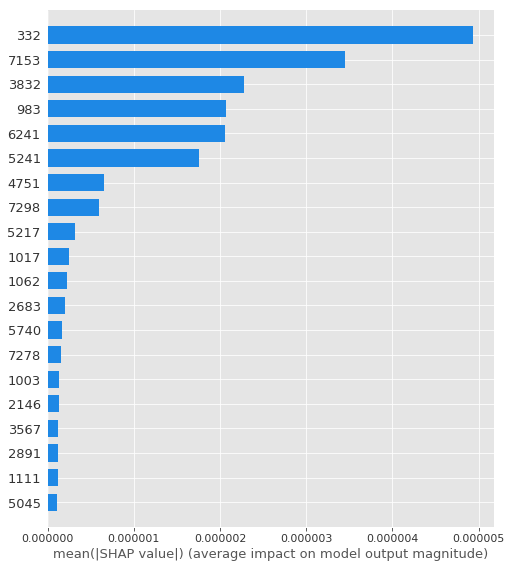

In [18]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [35]:
import numpy as np

max_display = 20
feature_names = X_train.columns

feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))
feature_order = feature_order[-min(max_display, len(feature_order)):]

feature_inds = feature_order[:max_display]
y_pos = np.arange(len(feature_inds))
global_shap_values = np.abs(shap_values).mean(0)

feature_names_relevant = [feature_names[i] for i in feature_inds]
relevance_score = global_shap_values[feature_inds]

In [49]:
global_shap_values = np.abs(shap_values).mean(0)

df = pd.DataFrame({"entrez":feature_names, "relevance":global_shap_values}, index=feature_names)

fname = "hypmorf_fanconi_02_from_targets_to_pathways_global_explained_relevance.tsv"
df.to_csv(fname, sep="\t")

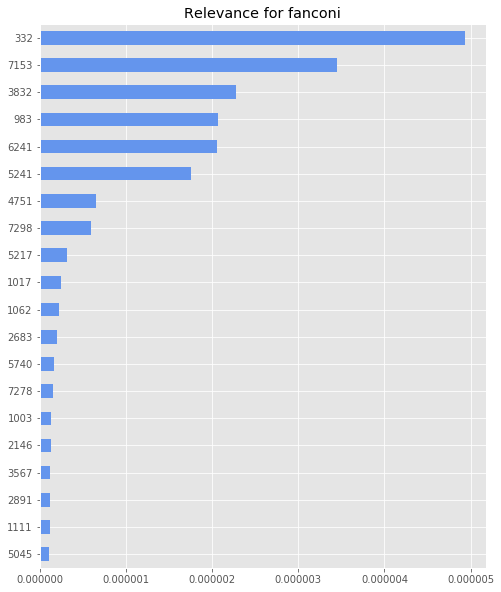

In [58]:
df.sort_values(by="relevance", ascending=False).iloc[:20, 1].iloc[::-1].plot(
    kind="barh", figsize=(8, 10), title="Relevance for {}".format(DISEASE), align='center', color="cornflowerblue");

In [43]:
global_shap_values.shape

(965,)

In [38]:
fname = "hypmorf_fanconi_02_from_targets_to_pathways_global_explained_relevance.tsv"
pd.DataFrame({"entrez":feature_names_relevant, "relevance":relevance_score}, index=feature_names_relevant).to_csv(fname, sep="\t")

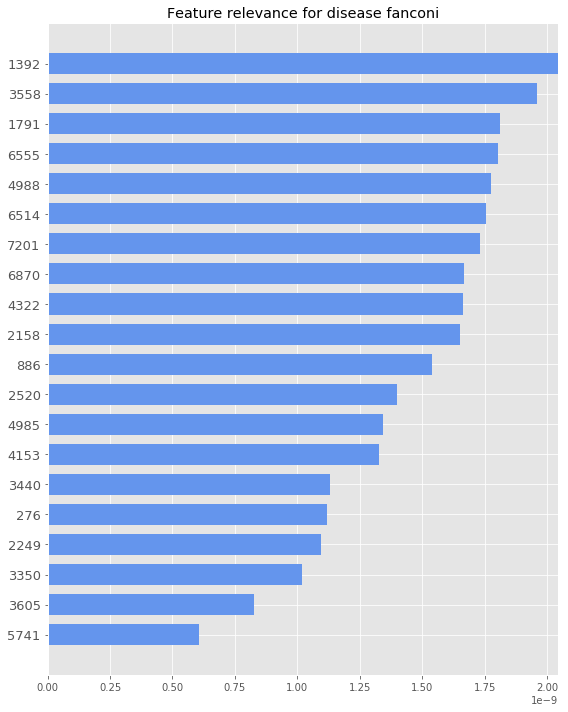

In [41]:
top_n = 20
plt.figure(figsize=(8, 10))
plt.barh(y_pos[:top_n], global_shap_values[feature_inds[:top_n]], 0.7, align='center', color="cornflowerblue")
plt.yticks(y_pos[:top_n], fontsize=13)
plt.gca().set_yticklabels(feature_names_relevant[:top_n])
plt.title("Feature relevance for disease {}".format(DISEASE))
plt.tight_layout()

In [21]:
fanconi_gene_text = """84126  	ATRIP; ATR interacting protein [KO:K10905]
545  	ATR; ATR serine/threonine kinase [KO:K06640] [EC:2.7.11.1]
57697  	FANCM; FA complementation group M [KO:K10896]
91442  	FAAP24; FA core complex associated protein 24 [KO:K10898]
378708  	CENPS; centromere protein S [KO:K11511]
100526739  	CENPS-CORT; CENPS-CORT readthrough [KO:K11511]
201254  	CENPX; centromere protein X [KO:K15360]
9894  	TELO2; telomere maintenance 2 [KO:K11137]
3280  	HES1; hes family bHLH transcription factor 1 [KO:K06054]
80233  	FAAP100; FA core complex associated protein 100 [KO:K10993]
2175  	FANCA; FA complementation group A [KO:K10888]
2187  	FANCB; FA complementation group B [KO:K10889]
2176  	FANCC; FA complementation group C [KO:K10890]
2178  	FANCE; FA complementation group E [KO:K10892]
2188  	FANCF; FA complementation group F [KO:K10893]
2189  	FANCG; FA complementation group G [KO:K10894]
55120  	FANCL; FA complementation group L [KO:K10606] [EC:2.3.2.27]
57599  	WDR48; WD repeat domain 48 [KO:K15361]
7398  	USP1; ubiquitin specific peptidase 1 [KO:K11832] [EC:3.4.19.12]
29089  	UBE2T; ubiquitin conjugating enzyme E2 T [KO:K13960] [EC:2.3.2.23]
55215  	FANCI; FA complementation group I [KO:K10895]
2177  	FANCD2; FA complementation group D2 [KO:K10891]
675  	BRCA2; BRCA2 DNA repair associated [KO:K08775]
79728  	PALB2; partner and localizer of BRCA2 [KO:K10897]
5889  	RAD51C; RAD51 paralog C [KO:K10870]
5888  	RAD51; RAD51 recombinase [KO:K04482]
672  	BRCA1; BRCA1 DNA repair associated [KO:K10605] [EC:2.3.2.27]
83990  	BRIP1; BRCA1 interacting protein C-terminal helicase 1 [KO:K15362] [EC:3.6.4.12]
22909  	FAN1; FANCD2 and FANCI associated nuclease 1 [KO:K15363] [EC:3.1.4.1 3.1.21.-]
4292  	MLH1; mutL homolog 1 [KO:K08734]
5395  	PMS2; PMS1 homolog 2, mismatch repair system component [KO:K10858]
51455  	REV1; REV1 DNA directed polymerase [KO:K03515] [EC:2.7.7.-]
5980  	REV3L; REV3 like, DNA directed polymerase zeta catalytic subunit [KO:K02350] [EC:2.7.7.7]
5429  	POLH; DNA polymerase eta [KO:K03509] [EC:2.7.7.7]
11201  	POLI; DNA polymerase iota [KO:K03510] [EC:2.7.7.7]
51426  	POLK; DNA polymerase kappa [KO:K03511] [EC:2.7.7.7]
353497  	POLN; DNA polymerase nu [KO:K16618] [EC:2.7.7.7]
80010  	RMI1; RecQ mediated genome instability 1 [KO:K10990]
116028  	RMI2; RecQ mediated genome instability 2 [KO:K15365]
7156  	TOP3A; DNA topoisomerase III alpha [KO:K03165] [EC:5.6.2.1]
8940  	TOP3B; DNA topoisomerase III beta [KO:K03165] [EC:5.6.2.1]
641  	BLM; BLM RecQ like helicase [KO:K10901] [EC:3.6.4.12]
6117  	RPA1; replication protein A1 [KO:K07466]
6118  	RPA2; replication protein A2 [KO:K10739]
6119  	RPA3; replication protein A3 [KO:K10740]
29935  	RPA4; replication protein A4 [KO:K10741]
80198  	MUS81; MUS81 structure-specific endonuclease subunit [KO:K08991] [EC:3.1.22.-]
146956  	EME1; essential meiotic structure-specific endonuclease 1 [KO:K10882] [EC:3.1.22.-]
197342  	EME2; essential meiotic structure-specific endonuclease subunit 2 [KO:K10883]
2072  	ERCC4; ERCC excision repair 4, endonuclease catalytic subunit [KO:K10848] [EC:3.1.-.-]
2067  	ERCC1; ERCC excision repair 1, endonuclease non-catalytic subunit [KO:K10849]
548593  	SLX1A; SLX1 homolog A, structure-specific endonuclease subunit [KO:K15078] [EC:3.6.1.-]
79008  	SLX1B; SLX1 homolog B, structure-specific endonuclease subunit [KO:K15078] [EC:3.6.1.-]
84464  	SLX4; SLX4 structure-specific endonuclease subunit [KO:K10484]"""

In [27]:
fanconi_entrez_list = [s for s in fanconi_gene_text.split() if s.isdigit()]

In [30]:
genes.index[genes.approved_targets].isin(fanconi_entrez_list)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

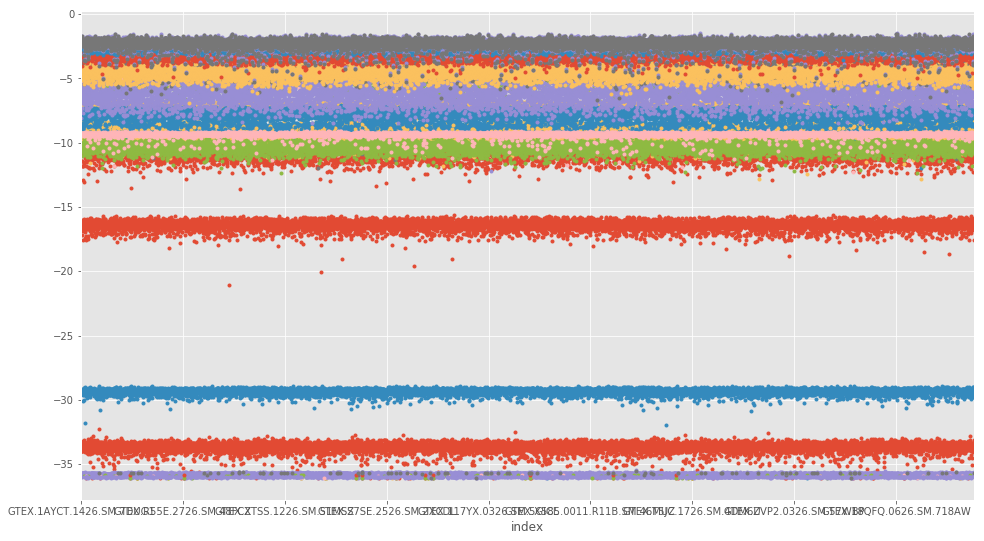

In [65]:
Y_train.apply(lambda x: np.log(x+np.finfo(np.float).eps)).plot(style=".", legend=False, figsize=(16, 9))

Text(0.5, 1.0, 'Circuit values for fanconi')

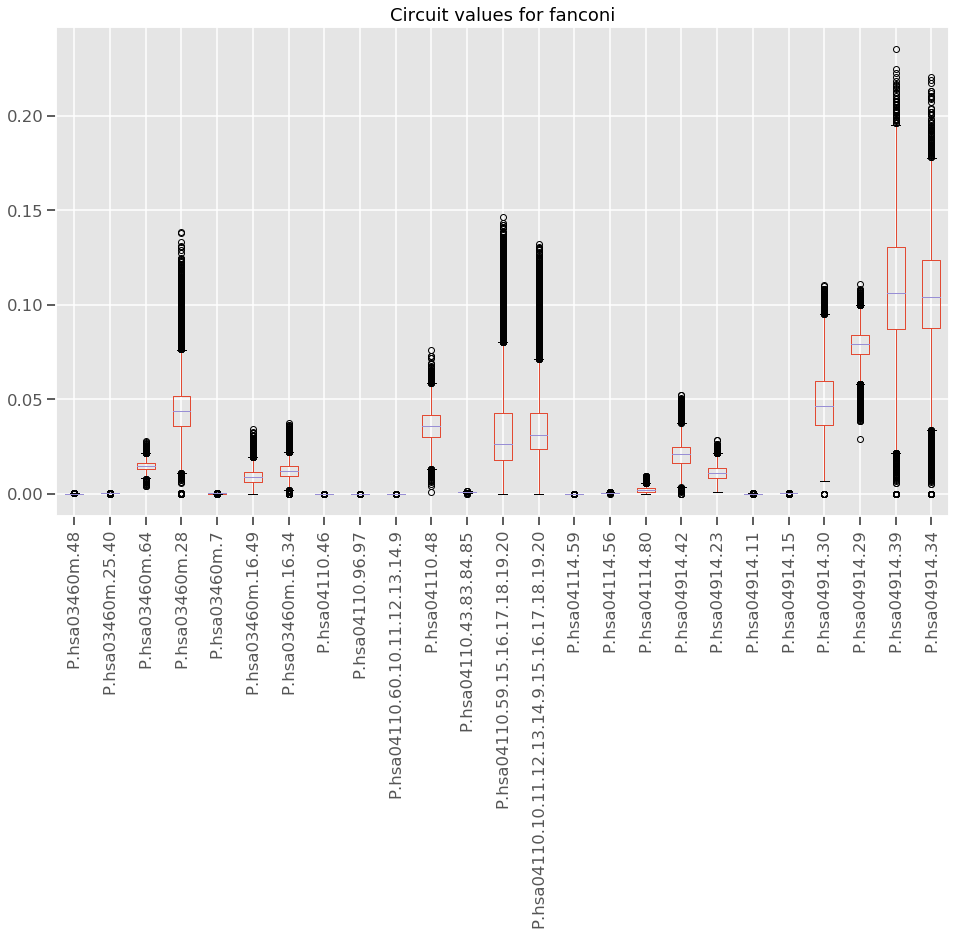

In [76]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
Y_train.plot(kind="box", legend=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Circuit values for {}".format(DISEASE))

Text(0.5, 1.0, '(log)-Circuit values for fanconi')

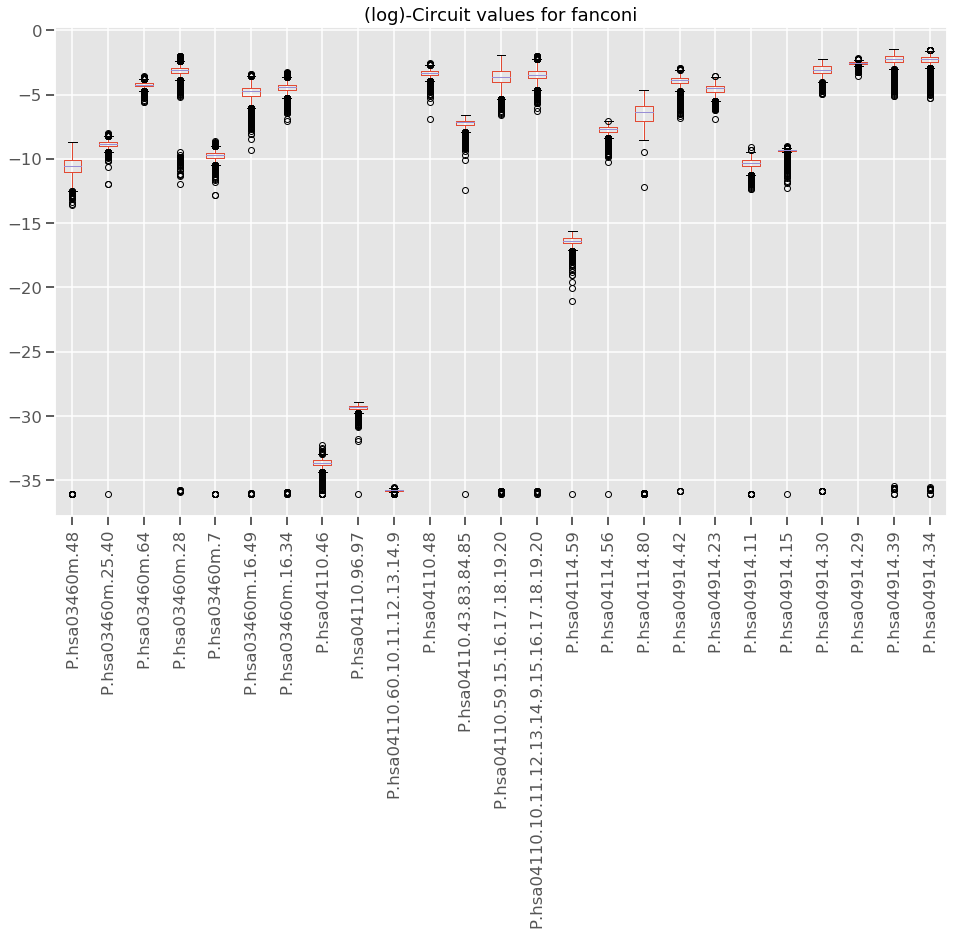

In [72]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
Y_train.apply(lambda x: np.log(x+np.finfo(np.float).eps)).plot(kind="box", legend=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("(log)-Circuit values for {}".format(DISEASE))

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.gaussian_process import GaussianProcessRegressor

In [75]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100)

In [77]:
rf.fit(X_train, Y_train.apply(lambda x: np.log(x+np.finfo(np.float).eps)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
Y_train_hat = rf.predict(X_train)
Y_test_hat = rf.predict(X_test)

In [82]:
metrics.r2_score(Y_train.apply(lambda x: np.log(x+np.finfo(np.float).eps)), Y_train_hat), metrics.r2_score(Y_test.apply(lambda x: np.log(x+np.finfo(np.float).eps)), Y_test_hat)

(0.9199717290030505, 0.515374275544774)

In [85]:
r2_test = metrics.r2_score(Y_test.apply(lambda x: np.log(x+np.finfo(np.float).eps)), Y_test_hat, multioutput="raw_values")
r2_test = pd.DataFrame(r2_test, index=Y.columns, columns=["r2"])
r2_test["pathways"] = Y.columns.str.split(".").str[1]

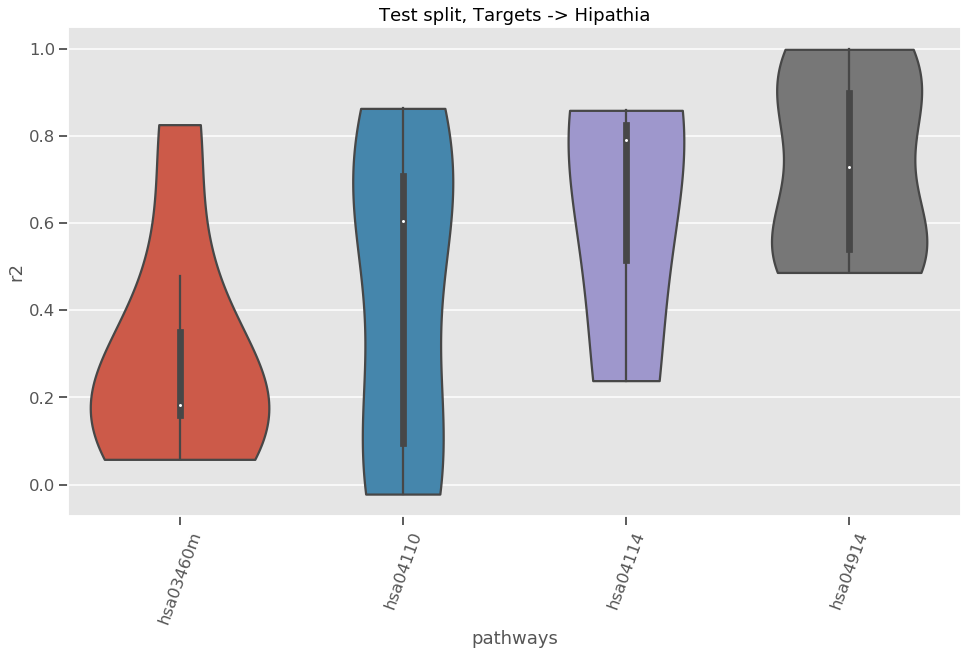

In [86]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.violinplot(x="pathways", y="r2", data=r2_test, ax=ax, cut=0);
ax.set_title("Test split, Targets -> Hipathia");
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [98]:
from sklearn.gaussian_process import kernels

lin_kernel = kernels.ConstantKernel() + kernels.ConstantKernel() * kernels.DotProduct()
gp = GaussianProcessRegressor(kernel=lin_kernel)

In [99]:
gp.fit(X_train, Y_train.apply(lambda x: np.log(x+np.finfo(np.float).eps)))

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + 1**2 * DotProduct(sigma_0=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [100]:
Y_train_hat = gp.predict(X_train)
Y_test_hat = gp.predict(X_test)

In [101]:
metrics.r2_score(Y_train.apply(lambda x: np.log(x+np.finfo(np.float).eps)), Y_train_hat), metrics.r2_score(Y_test.apply(lambda x: np.log(x+np.finfo(np.float).eps)), Y_test_hat)

(0.5459262446137035, 0.39677728795227724)

In [102]:
r2_test = metrics.r2_score(Y_test.apply(lambda x: np.log(x+np.finfo(np.float).eps)), Y_test_hat, multioutput="raw_values")
r2_test = pd.DataFrame(r2_test, index=Y.columns, columns=["r2"])
r2_test["pathways"] = Y.columns.str.split(".").str[1]

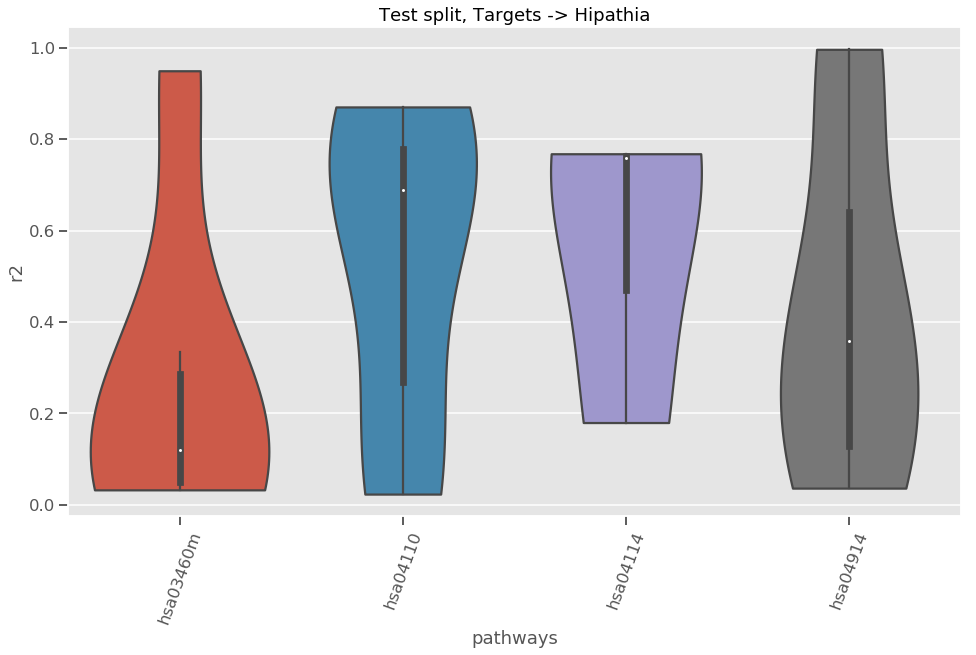

In [103]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.violinplot(x="pathways", y="r2", data=r2_test.loc[r2_test.r2 >= 0, :], ax=ax, cut=0);
ax.set_title("Test split, Targets -> Hipathia");
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [104]:
import gpflow as gpf
import gpflow.multioutput.kernels as mk
import gpflow.multioutput.features as mf

In [ ]:
Y_train_log = Y_train.apply(lambda x: np.log(x+np.finfo(np.float).eps))
Y_test_log = Y_test.apply(lambda x: np.log(x+np.finfo(np.float).eps))

In [ ]:
MAXITER = 10**5

gpf.reset_default_graph_and_session()

kernel = gpf.kernels.Matern12(X.shape[1], ARD=True)

m = gpf.models.GPR(X_train.values, Y_train_log.values, kernel)
opt = gpf.train.ScipyOptimizer()
opt.minimize(m, maxiter=MAXITER)

In [ ]:
Y_train_hat, cov_train = m.predict_y(X_train.values)
Y_test_hat, cov_test = m.predict_y(X_test.values)

In [ ]:
metrics.r2_score(Y_train_log, Y_train_hat), metrics.r2_score(Y_test_log, Y_test_hat)

In [ ]:
r2_test = metrics.r2_score(Y_test_log, Y_test_hat, multioutput="raw_values")
r2_test = pd.DataFrame(r2_test, index=Y.columns, columns=["r2"])
r2_test["pathways"] = Y.columns.str.split(".").str[1]

In [ ]:
sns.set_context("talk")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.violinplot(x="pathways", y="r2", data=r2_test, ax=ax, cut=0);
ax.set_title("Test split, Targets -> Hipathia");
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [28]:
r2_test.pathways.unique()

array(['hsa03460m'], dtype=object)

In [29]:
pathways = ["hsa03460m", "hsa04110"]

In [35]:
Y.filter(axis=1, regex="|".join(pathways)).columns

Index(['P.hsa03460m.48', 'P.hsa03460m.25.40', 'P.hsa03460m.64',
       'P.hsa03460m.28', 'P.hsa03460m.7', 'P.hsa03460m.16.49',
       'P.hsa03460m.16.34', 'P.hsa04110.46', 'P.hsa04110.96.97',
       'P.hsa04110.60.10.11.12.13.14.9', 'P.hsa04110.48',
       'P.hsa04110.43.83.84.85', 'P.hsa04110.59.15.16.17.18.19.20',
       'P.hsa04110.10.11.12.13.14.9.15.16.17.18.19.20'],
      dtype='object', name='index')